# Practical example of machine learning with *Iris flower data set*

## The *Iris flower data set*

The Iris flower data set is a common test case for machine learning.
This data set consists of 50 samples of tree different species of Iris ( = 150 peaces of data). Each sample is defined by 4 different features. The fact, that you can define the species of the Iris by the combination of the features makes it a good case for our first machine learning approach.<br>
Lets take a closer look at the data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./src/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
l = len(df['species'])
print (l)

150


In [6]:
colors = {'Iris-setosa' : 'r', 'Iris-versicolor' : 'g', 'Iris-virginica' : 'b'}
print(colors)

{'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}


Text(0, 0.5, 'Sepal width')

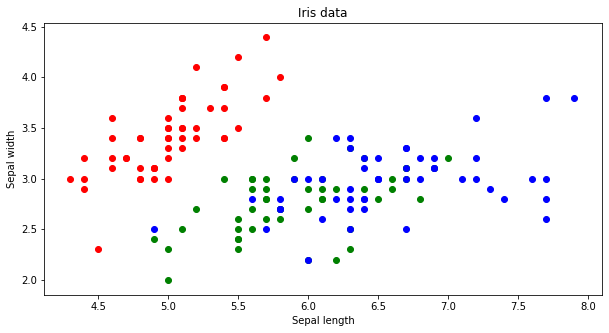

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(len(df['sepal_length'])):
    l = df['sepal_length'][i]
    w = df['sepal_width'][i]
    sp = df['species'][i]
    col = colors[df['species'][i]]
    ax.scatter(l, w, color=col)

ax.set_title('Iris data')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')

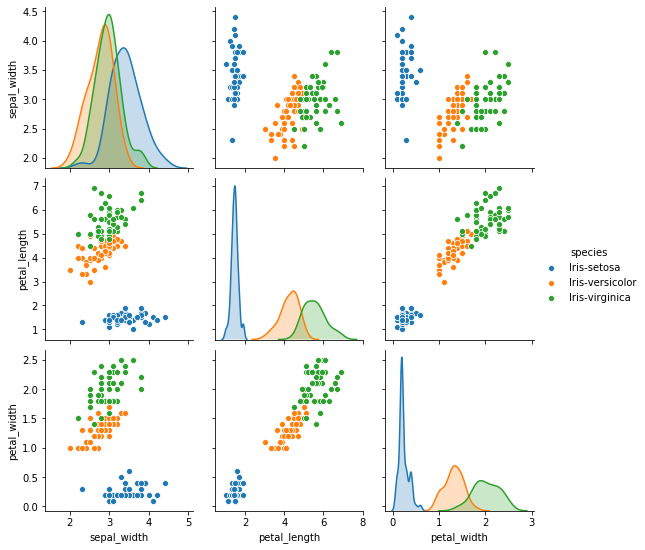

In [8]:
import seaborn as sns
sns.pairplot(df.iloc[:,1:6],hue="species")

In [9]:
species_to_int = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2} # turning each specie to an integer

df['species'] = df['species'].map(species_to_int)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now we have a clear understanding of the data and can proceed to our machine learning algorithm

## Preprocessing the data set
First we need to transform the dataset into train data, test data and label data.
As well as turning the ```pandas``` data frame into a 2-dimensional array

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#splitting the labels from the features (we take only the values to recieve a ndarray)
X = df.iloc[:,:-1].values # these are the features
y = df.iloc[:,-1].values # these are the labels
#print(X)
#print(y)

In [27]:
#transforming the labels to a (3, 150) array
encoder =  LabelEncoder() 
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values 
#print(Y)

In [24]:
#splitting the data set into train data and test data. The test data is used to evaluate the model
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

print('X_train:', X_train.shape, ' y_train:', y_train.shape)
print('X_test:', X_test.shape, ' y_test:', y_test.shape)

X_train: (120, 4)  y_train: (120, 3)
X_test: (30, 4)  y_test: (30, 3)


# Multilayer perceptron

We learned in the video(s) to neural networks that perceptrons and multilayer perceptrons are learning trough the adaption of weights during the process.
The same is happening in Keras with the ["Dense layer"](https://keras.io/api/layers/core_layers/dense/) and is described with the following formula:<br> ```output = activation(dot(input, kernel) + bias)```<br>
- activation is the activation function
- dot is the dot product (german: Skalarprodukt) , e.g. product of vectors
- kernel is a weights matrix created by the layer
Now lets combine this formula with the model of a perceptron:<br> 
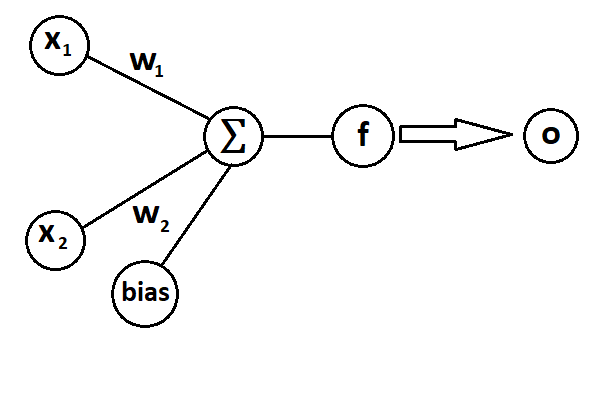

As we can see the Keras ```Dense layer``` is quite the same thing as a perceptron.
Lets take a closer look at the elements of the ```Dense layer```:

 ```
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
 ```

Dont worry, not all elements are important for now, but we now know most of them. 
The most important for now are:<br>
 - ```units``` defines our output, e.g. how our output is shaped
 - ```activation``` is the activation function we want to use<br>
 
And for the first layer we need to define the shape of the input 
 - ```input_shape=(n, m)```
 

In [15]:
import tensorflow as tf
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(30, input_shape=(4, ), activation='relu', name="layer1"))
model.add(layers.Dense(10, activation='relu', name="layer2"))
model.add(layers.Dense(5, activation='relu', name="layer3"))
model.add(layers.Dense(3, activation='softmax', name="layer4"))

### How do we choose the correct size of the Dense layers? 
Unfortunately there are no exact rules, and the size needs to be determined by try and error.
But there is a rule of thumb where to start: 
 - First layer: Number of classes times 8
 - Second layer: Number of classes times 4
 - Third layer: Number of classes times 2
 - Forth layer: Number of classes

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 30)                150       
_________________________________________________________________
layer2 (Dense)               (None, 10)                310       
_________________________________________________________________
layer3 (Dense)               (None, 5)                 55        
_________________________________________________________________
layer4 (Dense)               (None, 3)                 18        
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100)
y_pred = model.predict(X_test)

In [ ]:
score = model.evaluate(X_test, y_test) #Returns the loss value & metrics values for the model in test mode
score

In [ ]:
Xnew = np.array([[input("Insert sepal_length (range 4-8)"),
                  input("Insert sepal_widthh (range 2-4.5)"),
                  input("Insert petal_length (range 1-7)"),
                  input("Insert petal_width (range 0.1-2.5)")]])
print(Xnew)

In [ ]:
#Xnew = np.array([[3, 2.5, 5,  0.6]])

In [ ]:
ynew = model.predict_classes(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

In [ ]:
if ynew == 0: 
    print('Iris-setosa')
elif ynew == 2:
    print ('Iris-virginica')
else:
    print('Iris-versicolor')

In [ ]:
ynew = model.predict_proba(Xnew)
np.round(ynew, 2)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
type(ynew)